<a href="https://colab.research.google.com/github/trighpro123/Emotions/blob/main/Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from PIL import Image
import cv2

In [29]:
data_root='/content/drive/MyDrive/AI/Dataset/Emotions'

In [32]:
IMAGE_SHAPE = (150, 150)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
# datagen_kwargs = dict(rescale=1./255, validation_split=.20)
datagen_kwargs = dict(rescale=1./255)
# valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
# valid_generator = valid_datagen.flow_from_directory(
# TRAINING_DATA_DIR,
# subset="validation",
# shuffle=True,
# target_size=IMAGE_SHAPE)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)


/content/drive/MyDrive/AI/Dataset/Emotions
Found 114 images belonging to 4 classes.


In [33]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)
print(train_generator.class_indices)
# (image_batch_train)
# image_batch_train_gray=[]
# for i in range (0,np.shape(image_batch_train)):
#   image_batch_train_gray[i]=cv2.cvtColor(train_generator[i], cv2.COLOR_BGR2GRAY)
# plt.imshow(image_batch_train_gray[1])

Image batch shape:  (32, 150, 150, 3)
Label batch shape:  (32, 4)
['Buon' 'Ghetom' 'Hanhphuc' 'Sohai']
{'Buon': 0, 'GheTom': 1, 'HanhPhuc': 2, 'SoHai': 3}


(32, 150, 150, 3)

In [19]:

model=Sequential()
# BLock 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model.add(MaxPooling2D((2,2)))

# #Tạo neurel model
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

#Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
# history=model.fit(train_generator,epochs=50,validation_data=valid_generator,verbose=1)
history=model.fit(train_generator,epochs=50,verbose=1)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

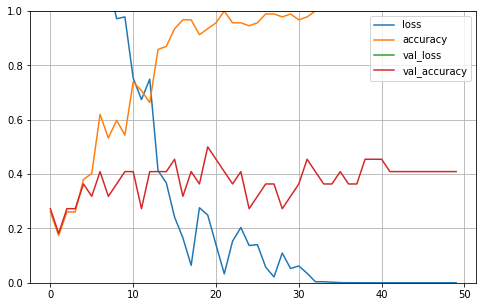

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


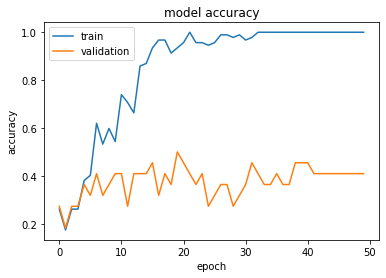

In [8]:
# # Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

In [ ]:
# SAVE
model.save("Emotions.h5")

Buon


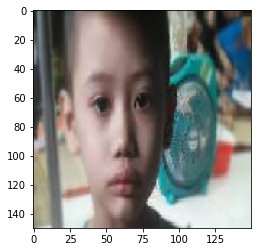

In [20]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

######
filename = "/content/drive/MyDrive/AI/Dataset/EmotionsTest/buon.jpg"
img=image.load_img(filename,target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Buon")
if doan[0]==1:
  print("Ghe Tom")
if doan[0]==2:
  print("Hanh Phuc")
if doan[0]==3:
  print("So Hai")



Buon


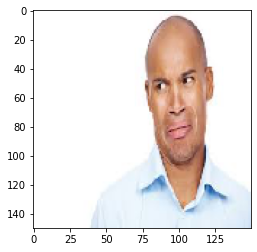

In [35]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

######
filename = "/content/drive/MyDrive/AI/Dataset/EmotionsTest/ghetom.jpg"
img=image.load_img(filename,target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Buon")
if doan[0]==1:
  print("Ghe Tom")
if doan[0]==2:
  print("Hanh Phuc")
if doan[0]==3:
  print("So Hai")



Hanh Phuc


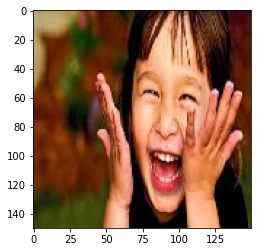

In [22]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

######
filename = "/content/drive/MyDrive/AI/Dataset/EmotionsTest/hanhphuc.jpg"
img=image.load_img(filename,target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Buon")
if doan[0]==1:
  print("Ghe Tom")
if doan[0]==2:
  print("Hanh Phuc")
if doan[0]==3:
  print("So Hai")



Buon


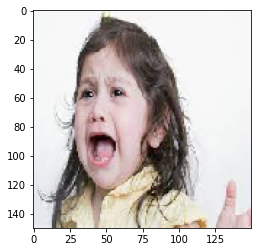

In [38]:
#####    CODE nhận diện đánh giá model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image 
import numpy as np

######
filename = "/content/drive/MyDrive/AI/Dataset/EmotionsTest/sohai.jpg"
img=image.load_img(filename,target_size=(150,150)) # chuyển về độ phân giải mong muốn thành 32x32
plt.imshow(img)
img=image.img_to_array(img) # chuyển sang mảng array để reshape

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
doan=np.argmax(model.predict(img),axis=1)
if doan[0]==0:
  print("Buon")
if doan[0]==1:
  print("Ghe Tom")
if doan[0]==2:
  print("Hanh Phuc")
if doan[0]==3:
  print("So Hai")

